<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_6_Sat_Porc_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usefull links

*   https://colab.research.google.com/github/ahmadkhan242/jupyter_widgets/blob/main/jupyter_widgets.ipynb#scrollTo=UfOucuOo8-Cl

*   https://towardsdatascience.com/4-easy-steps-for-implementing-catboost-c196fd82274b






# Library

## Pip Install

In [3]:
from google.colab import output
output.enable_custom_widget_manager()

In [4]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
!pip install catboost

In [ ]:
!pip install ipywidgets

In [7]:
!jupyter nbextension enable  — py widgetsnbextension

Please specify one nbextension/package at a time


## Packages

In [8]:
import pandas as pd
from ipywidgets import widgets
from IPython.display import display

In [9]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Data

In [15]:
dataframe = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
dataframe.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,814

# Pre Processing

move date to index

Subset data

Change Qty

In [16]:
# move date to 
#df.set_index('month')
dataframe = dataframe.set_index('date')

In [18]:
dataframe = dataframe[[ 'Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4' ]]

In [19]:
dataframe.at[39,'Quantity'] = -1.3035153046741994

In [20]:
dataframe.head(3)

,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4
date,,,,,
2017-01-01,1.503548,0.699923,502084.8330,102.548972,69.107759
2017-02-01,0.076213,0.316156,530826.1625,102.919033,61.576356
2017-03-01,-1.346258,-0.267695,568447.4880,102.162670,57.195909


In [31]:
dataframe.shape

(55, 5)

In [32]:
55 * .75

41.25

13.75

# Split

In [23]:
y = dataframe['Quantity']
X = dataframe.loc[: ,dataframe.columns != 'Quantity']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

Apply Model
the most important part is to designate your categorical variables, so that you can get the most out of your CatBoost model.

CatBoost has some awesome plots that visualize the error metric improvements over iterations, so if you want to visually see how the train and test set compare over time, setting the plot to True

## Here are the main model commands:

In [25]:
#CAT_FEATURES = [Feature_Names.0] #list of your categorical features



# set up the model
catboost_model = CatBoostRegressor(n_estimators=100,
                                   loss_function = 'RMSE',
                                   eval_metric = 'RMSE')
                                   #cat_features = CAT_FEATURES)

In [ ]:
# fit model
catboost_model.fit(X_train, y_train, 
                   eval_set = (X_test, y_test),
                   use_best_model = True,
                   plot = True)

In [27]:
from google.colab import output
output.enable_custom_widget_manager()

In [28]:
from google.colab import output
output.disable_custom_widget_manager()

In [29]:
# get your predictions
preds = catboost_model.predict(X_test)

In [30]:
preds

array([ 0.43874328, -0.58262884,  0.42949485, -0.1250164 , -0.22791917,
        0.50210145, -0.52849225, -0.33300017, -0.17433587,  0.04908679,
       -0.53776775, -0.91610083,  0.60272138,  0.50227282])

In [34]:
# The data was split 0.75 = Train set
# The X test comes to 13.75 hence the 14  items in "preds"
55 * 0.25


13.75

### B
Here i will attempt to plug in juan;s code

# Juan's functions

In [39]:
def Model_Performance(model,X_train,y_train,X_test, y_test):
     
    model.fit(X_train,y_train) 
    #model.fit(X_train,y_train, verbose = 0)#For Catboost
    y_pred_Train = model.predict(X_train) #Predictions
    y_pred_Test = model.predict(X_test) #Predictions
    
    Metrics(y_test, y_pred_Test)
    
    Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)
    
    Multiple_Runs(model,X_train,y_train,X_test, y_test)
    
    return

In [40]:
def Metrics(y_test, y_pred_Test):
    print('Test Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return

In [41]:
def Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test):

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].grid()
    ax[0].set_xlabel('Observed Label')
    ax[0].set_ylabel('Predicted Label')
    ax[0].set_title('Training Set')

    ax[1].scatter(y_test, y_pred_Test)
    ax[1].grid()
    ax[1].set_xlabel('Observed Label')
    ax[1].set_ylabel('Predicted Label')
    ax[1].set_title('Testing Set')
    plt.show()
    
    return

In [42]:
def Multiple_Runs(model,X_train,y_train,X_test, y_test):

    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in tqdm(range(100)):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
        #model.fit(X_train,y_train, verbose = 0)#For Catboost    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation: ', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation: ', np.std(Test_R2))

## Stadardiztion (Juan's functions will be looking for these)


### Training Set Mean

In [43]:
mean = X_train.mean()
print(mean)

Seasonal                                 -0.007304
Gray_cement_dispatch_comercial       540485.571116
ISE                                     105.707051
Construction_lic_area/unt_SIlag_4        62.605747
dtype: float64


<font color = 'blue'>Training Test Standard Deviation
### 


In [44]:
stdev = X_train.std()
print(stdev)

Seasonal                                 1.050611
Gray_cement_dispatch_comercial       79567.183196
ISE                                      4.942473
Construction_lic_area/unt_SIlag_4        3.488844
dtype: float64


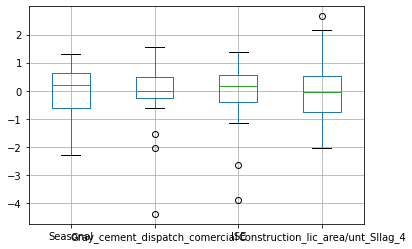

In [45]:
#run without this for KNN first
X_train_st = (X_train - mean)/stdev 
X_train_st.boxplot()

### Test Set preparations, Notice that test is standardized using training set mean and standard deviations

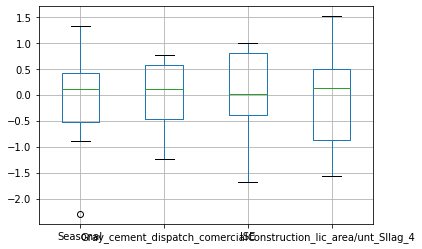

In [46]:
X_test_st = (X_test - mean)/stdev 
X_test_st.boxplot()

In [47]:
'''
model = KNeighborsRegressor(n_neighbors=100)
#model = RandomForestRegressor(n_estimators=10) #Number of trees in the forest
#model = ExtraTreesRegressor(n_estimators=10)
#model = GradientBoostingRegressor(n_estimators = 10) #Number of trees in the forest
#model = XGBRegressor(objective="reg:squarederror", random_state=42)
#model = CatBoostRegressor() #Change fit in functions
#model = LGBMRegressor() #Change fit in functions

#Model_Performance(model,X_train,y_train,X_test, y_test)
Model_Performance(model,X_train_st,y_train,X_test_st, y_test)
'''

model = catboost_model

Model_Performance(model,X_train_st,y_train,X_test_st, y_test)

Learning rate set to 0.160694
0:	learn: 0.9813696	total: 411us	remaining: 40.8ms
1:	learn: 0.9356888	total: 750us	remaining: 36.8ms
2:	learn: 0.8875495	total: 1.07ms	remaining: 34.5ms
3:	learn: 0.8582278	total: 1.39ms	remaining: 33.4ms
4:	learn: 0.8235573	total: 1.69ms	remaining: 32.1ms
5:	learn: 0.7946661	total: 2.03ms	remaining: 31.8ms
6:	learn: 0.7614589	total: 2.38ms	remaining: 31.6ms
7:	learn: 0.7313558	total: 2.7ms	remaining: 31.1ms
8:	learn: 0.7013984	total: 2.96ms	remaining: 30ms
9:	learn: 0.6719941	total: 3.27ms	remaining: 29.4ms
10:	learn: 0.6463130	total: 3.49ms	remaining: 28.3ms
11:	learn: 0.6214553	total: 3.89ms	remaining: 28.5ms
12:	learn: 0.5965114	total: 4.18ms	remaining: 28ms
13:	learn: 0.5752500	total: 4.64ms	remaining: 28.5ms
14:	learn: 0.5527897	total: 5.03ms	remaining: 28.5ms
15:	learn: 0.5361291	total: 5.45ms	remaining: 28.6ms
16:	learn: 0.5204020	total: 5.9ms	remaining: 28.8ms
17:	learn: 0.5055247	total: 6.31ms	remaining: 28.8ms
18:	learn: 0.4876332	total: 6.67ms

NameError: ignored

### Feature Importance

In [52]:
'''
RegForest = RandomForestRegressor(n_estimators=10)
RegForest.fit(X_train,y_train)

Features = df.columns[0:10]

Feature_importances = pd.Series(RegForest.feature_importances_, index=Features)
Feature_importances.plot.bar()
'''

RegCatBoost = CatBoostRegressor(n_estimators=10)
RegCatBoost.fit(X_train,y_train)

Features = dataframe.columns[0:10]

Feature_importances = pd.Series(RegCatBoost.feature_importances_, index=Features)
Feature_importances.plot.bar()


Learning rate set to 0.5
0:	learn: 0.8643326	total: 409us	remaining: 3.68ms
1:	learn: 0.7484689	total: 2.2ms	remaining: 8.8ms
2:	learn: 0.6504314	total: 2.71ms	remaining: 6.33ms
3:	learn: 0.6118392	total: 3.13ms	remaining: 4.7ms
4:	learn: 0.5359581	total: 3.55ms	remaining: 3.55ms
5:	learn: 0.4965546	total: 4.18ms	remaining: 2.79ms
6:	learn: 0.4495743	total: 4.68ms	remaining: 2.01ms
7:	learn: 0.4106250	total: 5.16ms	remaining: 1.29ms
8:	learn: 0.3789702	total: 5.6ms	remaining: 622us
9:	learn: 0.3412619	total: 6.06ms	remaining: 0us


ValueError: ignored

## Juans CATBoost Sectio

### Feature importance

In [54]:
cb = CatBoostRegressor()
cb.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0)

Features = dataframe.columns[0:10]

Feature_importances = pd.Series(cb.feature_importances_, index=Features)
Feature_importances.plot.bar()

ValueError: ignored